# Sale Prediction Project

By : Marde Cano

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filename = '/content/drive/MyDrive/Coding Dojo/01 Week 1: Python/sales_predictions.csv'

In [2]:
# load the dataset from Google Drive
df = pd.read_csv(filename)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
# display the info of the dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# dsiplay the no. of rows/records and columns in the dataset
df.shape

(8523, 12)

## Data Cleaning

The dataset doesn't have any duplicates

In [5]:
# find duplicate rows for all columns
df.duplicated().sum()

0

Item_Weight and Outlet_Size features have missing data.

In [6]:
# get the total number of missing values for Item_Weight
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# filter the Item_weight missing data
weight_missing = df['Item_Weight'].isnull()
weight_missing.head(11)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
Name: Item_Weight, dtype: bool

In [8]:
# Use pivot_table to create another dataframe to fill the missing data for Item_Weight
# item_weight_df = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
# item_weight_df

In [9]:
# create another dataframe based on the original dataset excluding the missing value
item_weight_df = df[['Item_Identifier', 'Item_Weight']].loc[~weight_missing, :]

# extract unique values by dropping duplicates
item_weight_df = item_weight_df.drop_duplicates(subset='Item_Identifier')

# set Item_Identifier as an index
item_weight_df = item_weight_df.set_index('Item_Identifier')
item_weight_df.head(10)

,Item_Weight
Item_Identifier,
FDA15,9.300
DRC01,5.920
FDN15,17.500
FDX07,19.200
NCD19,8.930
FDP36,10.395
FDO10,13.650
FDH17,16.200
FDU28,19.200


In [10]:
# df.loc[weight_missing, 'Item_Weight'] = df.loc[weight_missing, 'Item_Identifier'].apply(lambda x: item_weight_df.Item_Weight[x])

In [11]:
# fill the missing data in df with the data from the extracted dataframe (item_weight_df)
for i, item in enumerate(df['Item_Identifier']):
  if weight_missing[i]:
    if item in item_weight_df.index:
      df['Item_Weight'][i] = item_weight_df.loc[item, 'Item_Weight']
    else:
      df['Item_Weight'][i] = df['Item_Weight'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
df.loc[df['Item_Identifier'] == 'FDP10', :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.0,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [13]:
# display the sum of missing data for each attributes
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# filter the Outlet_Size missing data
size_missing = df['Outlet_Size'].isnull()
size_missing

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [15]:
# use pivot_table to create another dataframe where to get the information for our missing data
# get the outlet size for each outlet type by checking which value is repeatedly occuring
outlet_size_df = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', \
                                 aggfunc = (lambda x : x.mode()[0]))
outlet_size_df

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
# fill the missing data using the outlet_size_df
# I use mode to see what are the repeating values so it can replace the missing values
# deleting the missing fields will greatly affect the number of records I have
df.loc[size_missing, 'Outlet_Size'] = df.loc[size_missing, 'Outlet_Type'].apply(lambda x : outlet_size_df[x])

In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
cat_dtypes = df.dtypes

# filter all categorical data types
cat_dtypes = cat_dtypes[df.dtypes == 'object']
cat_dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [19]:
# iterate through each categorical attributes to check consistencies of information
for item in cat_dtypes.index:
  print(item)
  print(df[item].value_counts())
  print()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

In [20]:
# fixing the inconsistencies in Item_Fat_Content attributes
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [21]:
# check if the inconsistencies were fixed
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
# Statistical information of numerical attributes
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875419,0.066132,140.992782,1997.831867,2181.288914
std,4.645008,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

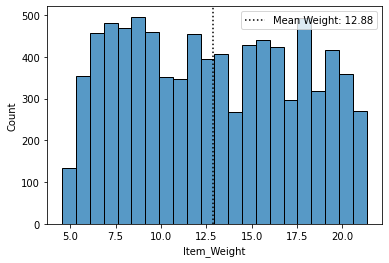

In [62]:
# plot the Item_Weight
ax = sns.histplot(data = df, x='Item_Weight')

mean_weight = round(df['Item_Weight'].mean(),2)
ax.axvline(mean_weight,color='k', ls=':', label = f'Mean Weight: {mean_weight:,.2f}')
ax.legend();

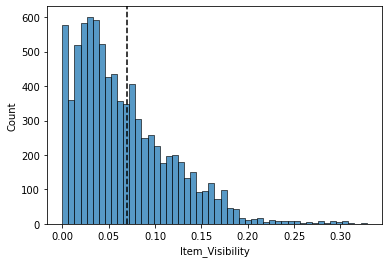

In [76]:
# plot the Item_Visibility
ax = sns.histplot(data = df, x='Item_Visibility')

mean_visibility = round(df['Item_Visibility'].mean(),2)
ax.axvline(mean_visibility,color='k', ls='--');

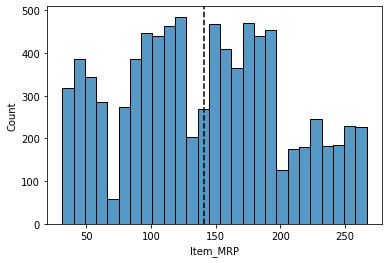

In [75]:
# plot the Item_MRP
ax = sns.histplot(data = df, x='Item_MRP')

mean_mrp = round(df['Item_MRP'].mean(),2)
ax.axvline(mean_mrp,color='k', ls='--');

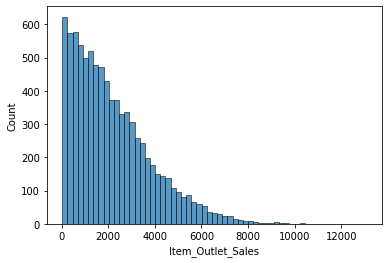

In [74]:
# plot the Item_Outlet_Sales
ax = sns.histplot(data = df, x='Item_Outlet_Sales')

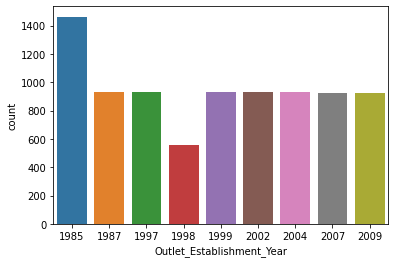

In [103]:
# plot the Outlet_Establishment_Year
ax = sns.countplot(data = df, x='Outlet_Establishment_Year')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


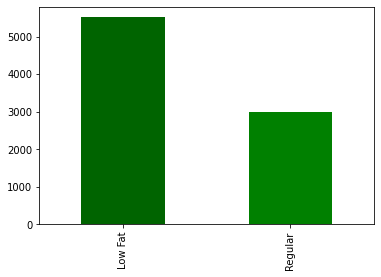

In [88]:
# count and sort the values of each item
fat_counts = df['Item_Fat_Content'].value_counts()

# plot the counts of each item fat content
fat_counts.plot(kind = 'bar', color = ['darkgreen', 'green'])
plt.show()

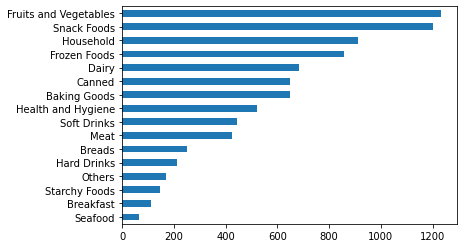

In [92]:
# count and sort each Item Type
type_counts = df['Item_Type'].value_counts().sort_values()

# plot Item Type
type_counts.plot(kind = 'barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


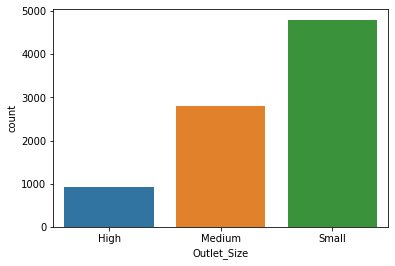

In [98]:
# plot the Outlet Size
sns.countplot(df['Outlet_Size'].sort_values())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


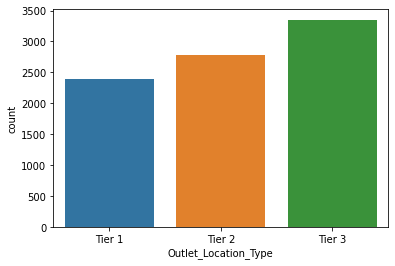

In [97]:
# plot the Outlet Location Type
sns.countplot(df['Outlet_Location_Type'].sort_values())

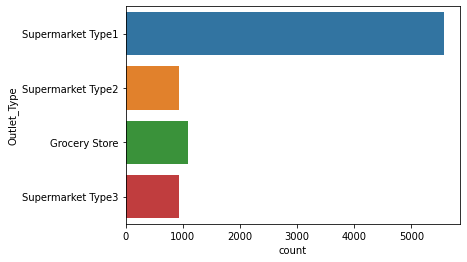

In [102]:
# plot the Outlet_Type
sns.countplot(data=df, y='Outlet_Type')

In [70]:
# check the correlation coeeficient of each numerical features
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009169,0.025972,-0.013418,0.013165
Item_Visibility,-0.009169,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025972,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.013418,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013165,-0.128625,0.567574,-0.049135,1.000000


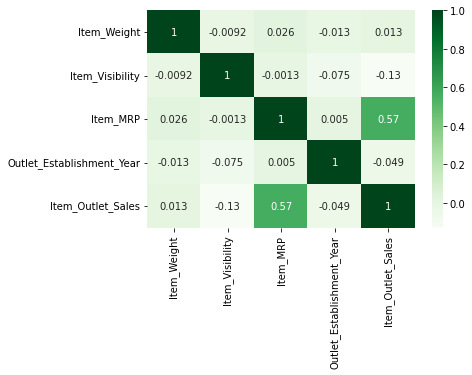

In [71]:
# display the heat map with labels
sns.heatmap(corr, annot = True, cmap = 'Greens')

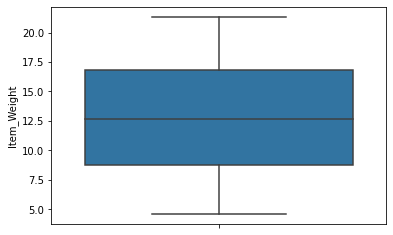

In [105]:
sns.boxplot(data=df, y='Item_Weight')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


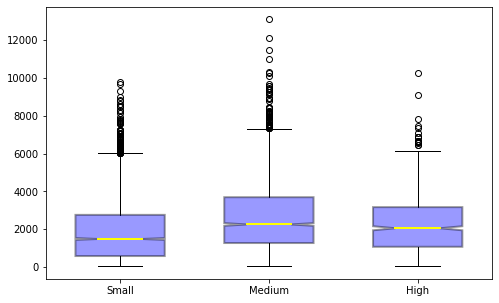

In [109]:
small = df.loc[df['Outlet_Size'] == 'Small', 'Item_Outlet_Sales'].values
medium = df.loc[df['Outlet_Size'] == 'Medium', 'Item_Outlet_Sales'].values
high = df.loc[df['Outlet_Size'] == 'High', 'Item_Outlet_Sales'].values

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(8,5))
boxplots = axes.boxplot([small, medium, high], notch = True, 
             labels = ['Small','Medium', 'High'],
             widths = 0.6,
             patch_artist = True,
             medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
             boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha=0.4))